<a href="https://colab.research.google.com/github/s1c5000/tensorflow2.0/blob/main/%EB%B6%84%EB%A5%98_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 분류

분류(classification)은 회귀와 함께 머신러닝에서 가장 기초적인 데이터 분석 방법중 하나이다.      
앞의 회귀에서는 알고리즘의 퍼포먼스를 측정하기 위해 잔차의 제곱의 합(sse), 잔차의 제곱의 평균(mse) 등을 사용하고 이 값들은 보통 실수이다.     
분류에서는 같은 목적으로 예측이 정담을 얼마나 맞혔는지에 대한 정확도를 측정한다.

분류 문제에는 명확한 정답이 있는 경우도 있지만 그렇지 않은 경우도 있다. 예를 들어 개인정보가 가려진 신용카드 사용정보로 비슷한 유형의 구매자 군집을 분류하는 문제도 분류문제의 일종이다. 이것은 정답이 없어서 비지도학습이라 불린다. 해당 장에서는 정답이있는 분류만 다루도록 하겠다.

## 5.1 이항분류

이항분류는 정답의 범주가 2개인 부류문제이다.     
와인은 레드, 화이트 와인 크게 나눌 수 있다. 와인의 색을 보지않고 데이터만 보고 와인을 불류할 수 있을까?

In [ ]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

pandas의 dataframe으로 읽어왔다.    
각 행의 번호를 인덱스(index), 각 열의 이름을 속성(attribute)이라고 부른다.     
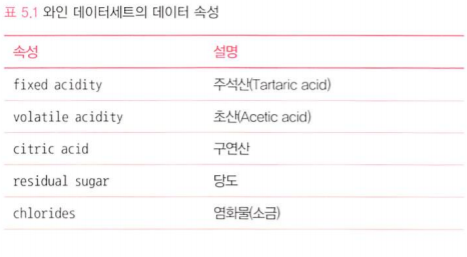        
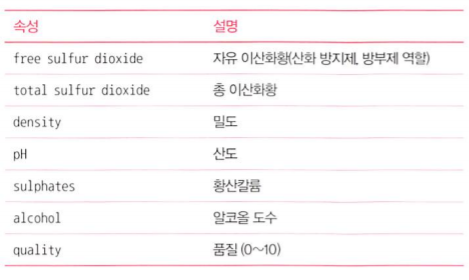

이 데이터를 학습시키려면 두 데이터를 합쳐야한다.     
그 전에 중요한것은 이 와인이 레드와인인지 화이트와인인지 표시해주는 속성을 추가해야한다.

In [ ]:
red['type']=0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

제일 오른쪽의 타입을 보면 min 값은 0 max값은 1인걸 확인할 수 있다. 평균값이 0.75인것을 보아 1이 더 많을 것으로 보인다. 

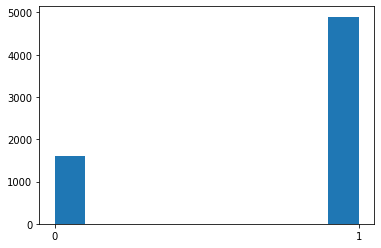

1    4898
0    1599
Name: type, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

print(wine['type'].value_counts())

히스토그램을 보면 1 이 더 많은 것을 확인할 수 있다.    
value_counts()로 정확한 개수를 볼 수 있다.    
딥러닝 학습을 하기위해 데이터를 훈련세트와 테스트 데이터 세트로 나누기 전 레드와인과 화이트와인이 비슷한 비율로 들어가도록 데이터를 랜덤하게 섞어야한다. 하지만 3:1의 비율은 이러한 고려없이 섞어도 문제가 거의없다.    
데이터를 석기전 해야할 일이 있다. 정규화이다.     
데이터가 어떤값으로 구성되어있는지 알기 어렵다면 info()로 알아보면된다


In [ ]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


모두 숫자이기때문에 안전하게 정규화가 가능하다

In [ ]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

정규화가 잘 되었다.   
이 데이터를 랜덤하게 섞은 후 학습을 위해 넘파이 array로 바꾸겠다

In [ ]:
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol  type  new_quality
626        0.413223          0.346667     0.174699  ...  0.159420   0.0          0.0
2410       0.264463          0.053333     0.156627  ...  0.304348   1.0          0.5
2335       0.371901          0.126667     0.204819  ...  0.333333   1.0          0.0
1627       0.421488          0.160000     0.295181  ...  0.202899   1.0          0.0
3871       0.223140          0.126667     0.114458  ...  0.304348   1.0          0.5

[5 rows x 13 columns]
[[0.41322314 0.34666667 0.1746988  0.02453988 0.14784053 0.01388889
  0.02073733 0.22537112 0.49612403 0.15168539 0.15942029 0.
  0.        ]
 [0.26446281 0.05333333 0.15662651 0.10276074 0.06312292 0.10069444
  0.49308756 0.17563139 0.51162791 0.20224719 0.30434783 1.
  0.5       ]
 [0.37190083 0.12666667 0.20481928 0.14723926 0.06478405 0.17013889
  0.25806452 0.19375361 0.35658915 0.16292135 0.33333333 1.
  0.        ]
 [0.4214876  0.16       0.29518072 0.0153

판다스의 sample()함수는 전체 데이터프레임에서 frac인수로 지정된 비율만큼의 행을 랜덤하게 뽑아서 새로운 데이터 프레임을 만든다.    
frac=1로 지정해서 100프로, 즉 모든 데이터를 뽑아서 섞는 것과 동일 한 효과이다.    
섞은 후 데이터 프레임을 to_numpy로 numpy array로 변환한다

이제 훈련과 테스트 데이터로 나누겠다.

In [ ]:
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:,:-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])
print(train_X.shape)
print(train_Y.shape)

[0.21487603 0.1        0.18072289 0.09969325 0.04651163 0.21527778
 0.52995392 0.15596684 0.26356589 0.06741573 0.17391304 0.5       ]
1.0
[0.2892562  0.16       0.1746988  0.01380368 0.04817276 0.10763889
 0.31797235 0.11278195 0.37209302 0.18539326 0.4057971  0.33333333]
1.0
[0. 1.]
[0. 1.]
(5197, 12)
(5197, 2)


먼저 80프로에 해당하는 데이터를 훈련데이터로 만든다. 나머지는 테스트로 만든다.    
tf.keras.utils에서 불러오는 to_categorical은 분류문제에서 자주 쓰이는 함수로 ,정답 행렬을 원_핫 인코딩 방식으로 바꾼다. 두번째 인수인 num_classes는 정답 클래스의 개수이다. 바꾼 결과 0.0은 [1. 0.]으로, 1.0은 [0. 1.]으로 바뀐 것을 확인 할 수 있다.

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
  tf.keras.layers.Dense(units=24, activation='relu'),
  tf.keras.layers.Dense(units=12, activation='relu'),
  tf.keras.layers.Dense(units=2, activation='softmax') # 이진분류니깐 sigmoid도 사용 가능
])
# 책의 오류 이진분류이고 label을 one_hot인코딩의 형태이기때문에 categorical_crossentropy써야한다.
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_57 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_58 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


 책의 오류 :  이진분류이고 label을 one_hot인코딩의 형태이기때문에 categorical_crossentropy써야한다.

마지막 레이어의 활성화 함수로 소프트맥스를사용했다.    
소프트맥스는 분류에서 가장많이쓰이는데 출력값들을 자연로그의 밑인 e의 지수로 사용해 계산한 뒤 모두 더한 값으로 나눈다. 이렇게 나온 결과값들은 총합이 1.0인 확률값이 된다.


마지막 레이어에서 한가지 더 주목할 것은 뉴런의 개수가 2개로 설정돼 있다는 것이다. 원 핫인코딩으로 변환한 정답의 차원수와 동일한 값이다. 정답이 [1 0] 일때 예측이 [1 0] 이면 100%, [0 1]이면 0%의 예측률을 보이는 것이다. 

손실함수인 loss에는 자주 쓰이는 mse대신 categorical_crossentropy라는 값이 들어갔다. 크로스 엔트로피는 엔트로피의 기댓값과 비슷하지만 약간 다른점이 있다.    
확률 부분에 p(x)를 곱하는 것과 달리 로그 뒤에는 q(x)를 곱한다. 여기서 q(x)란 분류 네트위크가 예측한 라벨의 확률값이다.       
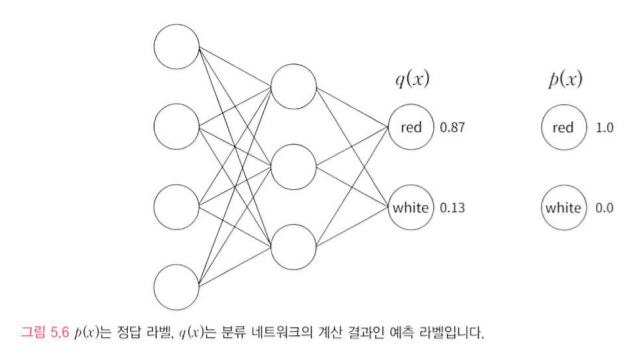

In [ ]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25) 

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.1709 - accuracy: 0.9294 - val_loss: 0.0393 - val_accuracy: 0.9900
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9851 - val_loss: 0.0652 - val_accuracy: 0.9777
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9849 - val_loss: 0.0301 - val_accuracy: 0.9900
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9872 - val_loss: 0.0311 - val_accuracy: 0.9915
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9879 - val_loss: 0.0292 - val_accuracy: 0.9915
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9882 - val_loss: 0.0397 - val_accuracy: 0.9885
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9879 - val_loss: 0.0476 - val_accuracy: 0.9900
Epoch 

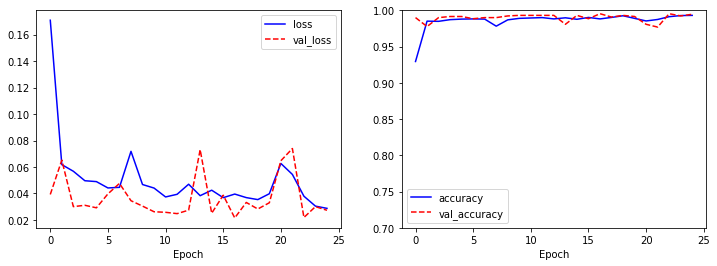

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9915


[0.040933407843112946, 0.9915384650230408]

## 5.2 다항 분류

다항분류란 범주의 수가 2개를 초과하는 경우이다. 앞의 와인 데이터세트에서 와인의 품질은 0에서 10까지의 숫자로 구분돼 있기때문에 이 데이터를 다항분류의 범주로 사용할 수 있다.

In [ ]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


각 항목의 차가 큰 걸 볼수 있다.

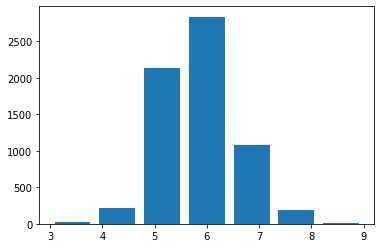

In [ ]:
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

각 데이터의 숫자가 차이가 나기 때문에 모든 범주의 세세한 분류는 어려울 것 같다. 그래서 범주르 크게 3가지로 재분류 하겠다. 

In [ ]:
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2
#wine.loc[wine.quality >= 7, 'new_quality'] = 2 # 이렇게 접근도 가능

In [ ]:
print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [ ]:
del wine['quality']
wine_norm = (wine - wine.min())/ (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac= 1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:,:-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(train_X[-1][0])
print(train_Y[0])

(5197, 12)
(5197, 3)
0.2727272727272727
[1. 0. 0.]


In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
  tf.keras.layers.Dense(units=24, activation='relu'),
  tf.keras.layers.Dense(units=12, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_89 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_90 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_91 (Dense)             (None, 3)                 39        
Total params: 2,139
Trainable params: 2,139
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25) 

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.7955 - val_loss: 0.4515 - val_accuracy: 0.8000
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.7993 - val_loss: 0.4098 - val_accuracy: 0.7846
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8029 - val_loss: 0.4238 - val_accuracy: 0.8023
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.7968 - val_loss: 0.4064 - val_accuracy: 0.7777
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.7996 - val_loss: 0.4382 - val_accuracy: 0.8046
Epoch 6/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.8088 - val_loss: 0.4406 - val_accuracy: 0.8000
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.7965 - val_loss: 0.4089 - val_accuracy: 0.8000
Epoch 

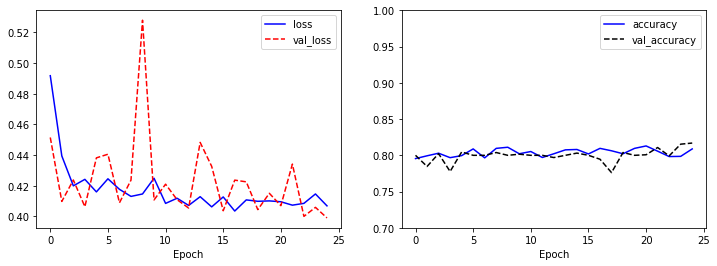

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.3818 - accuracy: 0.8354


[0.38176390528678894, 0.8353846073150635]

## 5.3 Fashion MNIST

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

print(len(train_x), len(test_x))

60000 10000


In [ ]:
print(train_y)

[9 0 0 ... 3 0 5]


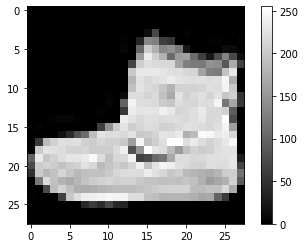

9


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_y[0])

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0

print(train_x[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

위의 다항분류에서는 정답 레이블을 원핫 인코딩으로 바꾸는 부분이있었다. 하지만 그렇게 하게되면 자원을 많이잡아먹게된다. 이미 훈련데이터와 테스트데이터의 정답들은 0, 2,4, 9 같은 정수로 답이 표시되어있다.    
이값들을 바꾸지 않고 사용하겠다.

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_97 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


sparse는 희소행렬을 의미한다. sparse_categorical_crossentropy를 이용하면 별도의 전처리 없이 희소행렬을 나타내는 데이터를 정답행렬로 사용 할 수있다.

In [ ]:
history = model.fit(train_x, train_y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3773 - accuracy: 0.8637 - val_loss: 0.3610 - val_accuracy: 0.8729
Epoch 2/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3412 - accuracy: 0.8764 - val_loss: 0.3423 - val_accuracy: 0.8780
Epoch 3/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3170 - accuracy: 0.8851 - val_loss: 0.3313 - val_accuracy: 0.8793
Epoch 4/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2999 - accuracy: 0.8878 - val_loss: 0.3401 - val_accuracy: 0.8783
Epoch 5/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2841 - accuracy: 0.8945 - val_loss: 0.3266 - val_accuracy: 0.8827
Epoch 6/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2730 - accuracy: 0.8989 - val_loss: 0.3187 - val_accuracy: 0.8840
Epoch 7/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2584 - accuracy: 0.9057 - val_loss: 0.3606 - val_accuracy:

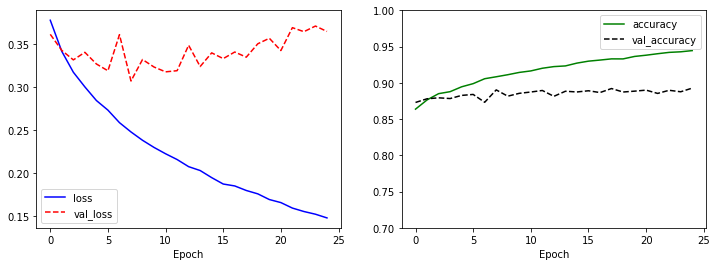

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

검증데이터의 손실이 감소하다가 시간이 지날수록 서서히 증가하는 과적합 현상을 확인할 수 있다. 

In [ ]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.8872


[0.3931599259376526, 0.8871999979019165]